In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Image
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving yumari.csv to yumari.csv


In [0]:
import io
ryn = pd.read_csv(io.BytesIO(uploaded['yumari.csv']))

In [56]:
ryn

,Year,Player,Pos,TRB,AST,PTS,PPG,RPG,APG
0,1951.0,Paul Arizin*,SF,640.0,138.0,1121.0,17,10,2
1,1951.0,Curly Armstrong,G-F,89.0,77.0,202.0,5,2,2
2,1951.0,Cliff Barker,SG,100.0,115.0,152.0,3,2,2
3,1951.0,Leo Barnhorst,SF,296.0,218.0,546.0,8,4,3
4,1951.0,Ed Bartels,F,84.0,12.0,72.0,4,5,1
...,...,...,...,...,...,...,...,...,...
24373,2017.0,Cody Zeller,PF,405.0,99.0,639.0,10,7,2
24374,2017.0,Tyler Zeller,C,124.0,42.0,178.0,3,2,1
24375,2017.0,Stephen Zimmerman,C,35.0,4.0,23.0,1,2,0
24376,2017.0,Paul Zipser,SF,125.0,36.0,240.0,5,3,1


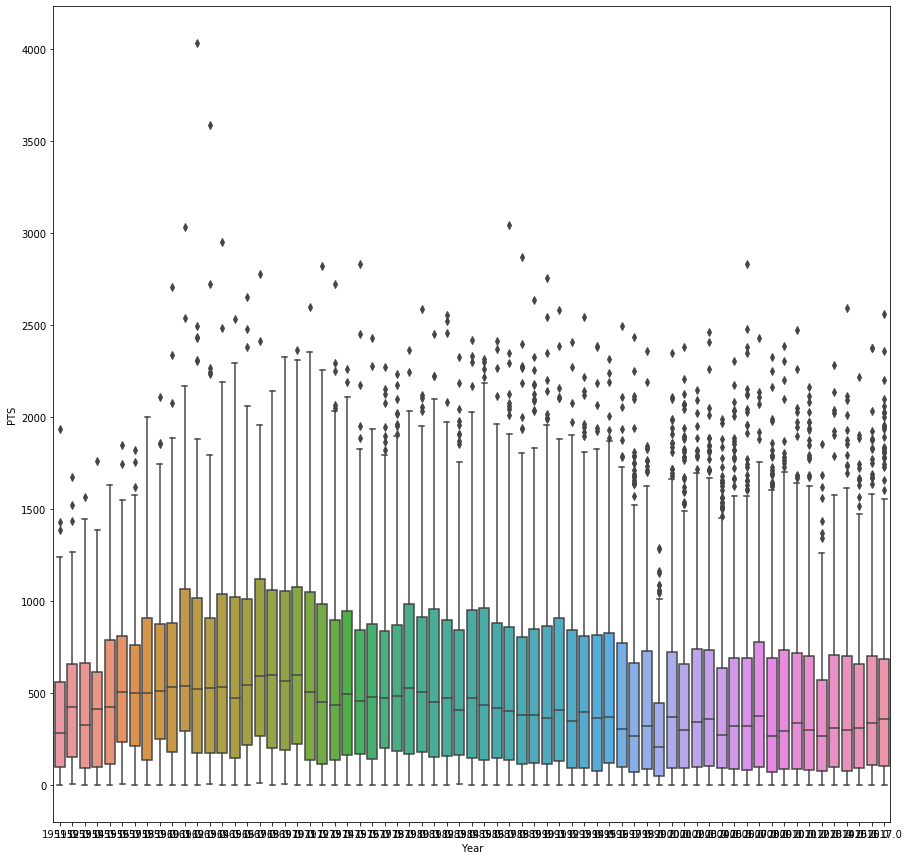

In [128]:
plt.figure(figsize = (15,15))
sns.boxplot("Year","PTS" , data=ryn);

In [46]:
modryn=ryn.dropna()
modryn.isnull().sum()

Year      0
Player    0
Pos       0
TRB       0
AST       0
PTS       0
PPG       0
RPG       0
APG       0
dtype: int64

In [150]:
(tes.PTS / tes.PTS.iloc[0] * 100)

Year
1951.0    100.000000
1952.0    119.010777
1953.0    107.115538
1954.0    112.320782
1955.0    134.993475
             ...    
2013.0    119.419630
2014.0    117.673922
2015.0    113.997613
2016.0    124.002544
2017.0    126.424902
Name: PTS, Length: 67, dtype: float64

In [152]:
(tes.TRB / tes.TRB.iloc[0] * 100)

Year
1951.0    100.000000
1952.0    122.847525
1953.0    109.352352
1954.0    119.420833
1955.0    138.254193
             ...    
2013.0     92.097774
2014.0     89.619588
2015.0     88.087350
2016.0     94.740425
2017.0     94.152957
Name: TRB, Length: 67, dtype: float64

In [153]:
(tes.AST / tes.AST.iloc[0] * 100)

Year
1951.0    100.000000
1952.0    124.703183
1953.0    109.945572
1954.0    114.948791
1955.0    138.701589
             ...    
2013.0    109.807756
2014.0    104.318730
2015.0    103.125506
2016.0    110.029217
2017.0    108.599580
Name: AST, Length: 67, dtype: float64

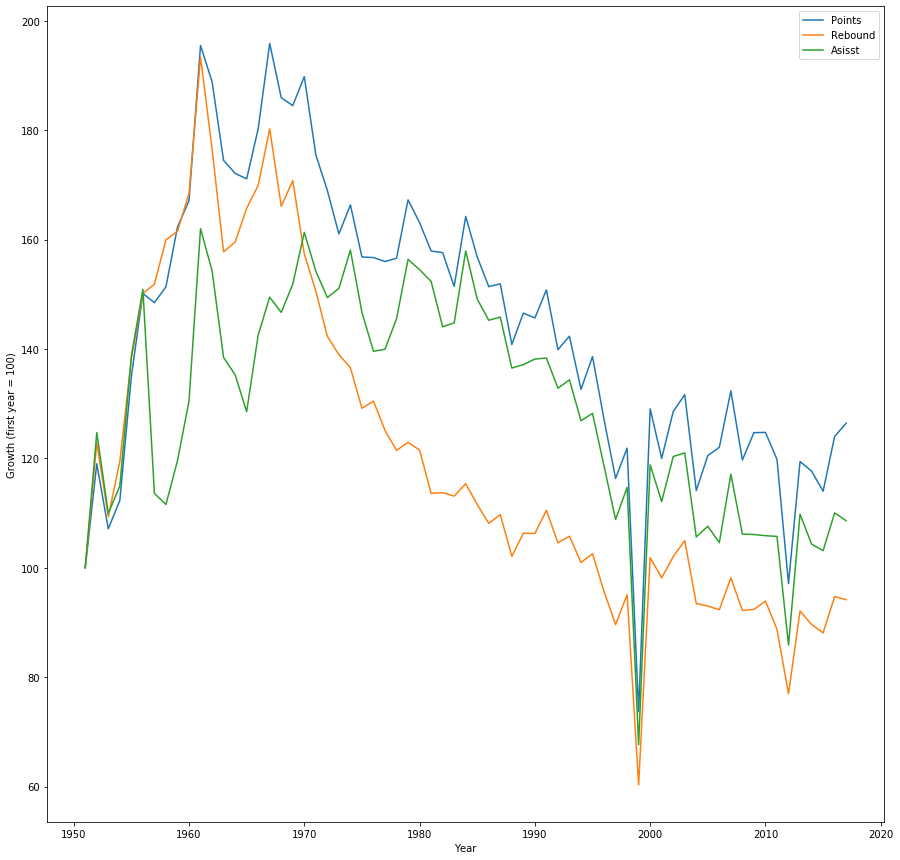

In [125]:
plt.figure(figsize = (15,15))
plt.plot(tes.PTS / tes.PTS.iloc[0] * 100)
plt.plot(tes.TRB / tes.TRB.iloc[0] * 100)
plt.plot(tes.AST / tes.AST.iloc[0] * 100)


plt.legend(['Points', 'Rebound', 'Asisst'])
plt.xlabel('Year')
plt.ylabel('Growth (first year = 100)')
plt.show()

In [62]:
tes = modryn.groupby('Year').mean()
tes


,TRB,AST,PTS
Year,,,
1951.0,208.557471,93.051724,375.505747
1952.0,256.207692,116.038462,446.892308
1953.0,228.062500,102.306250,402.225000
1954.0,249.061069,106.961832,421.770992
1955.0,288.339450,129.064220,506.908257
...,...,...,...
2013.0,192.076789,102.178010,448.427574
2014.0,186.908347,97.070376,441.872340
2015.0,183.712750,95.960061,428.067588


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


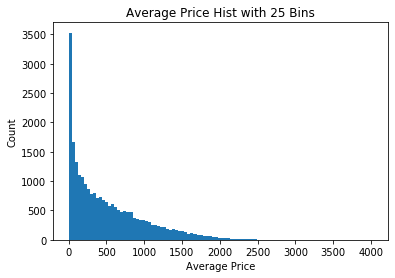

In [73]:
plt.hist(ryn.PTS, bins = 100)
plt.title('Average Price Hist with 25 Bins')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.show()

In [0]:
def plot_ecdf(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

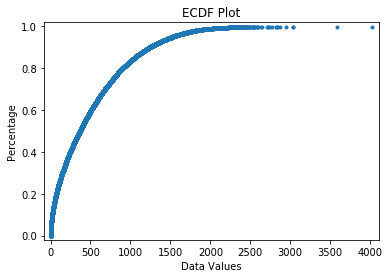

In [76]:
plot_ecdf(ryn['PTS'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


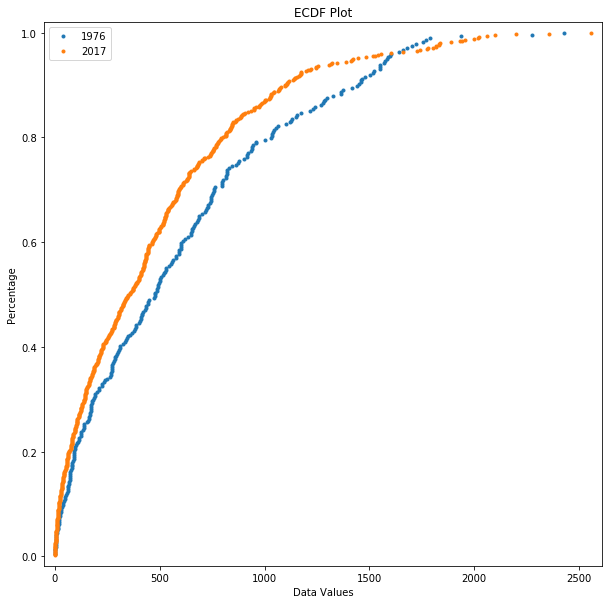

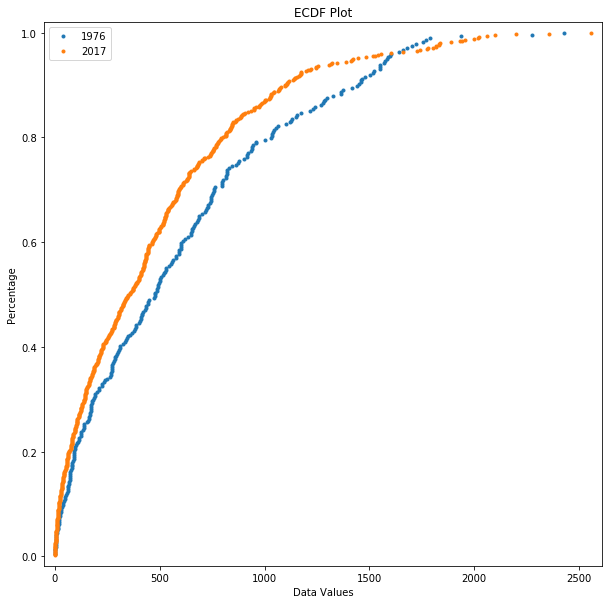

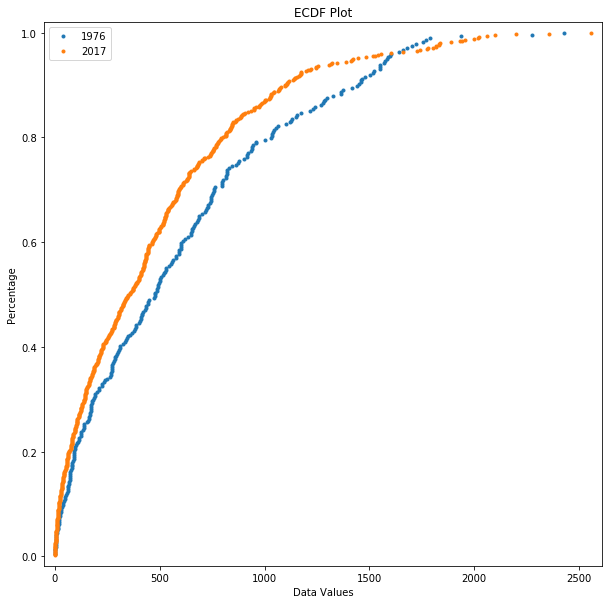

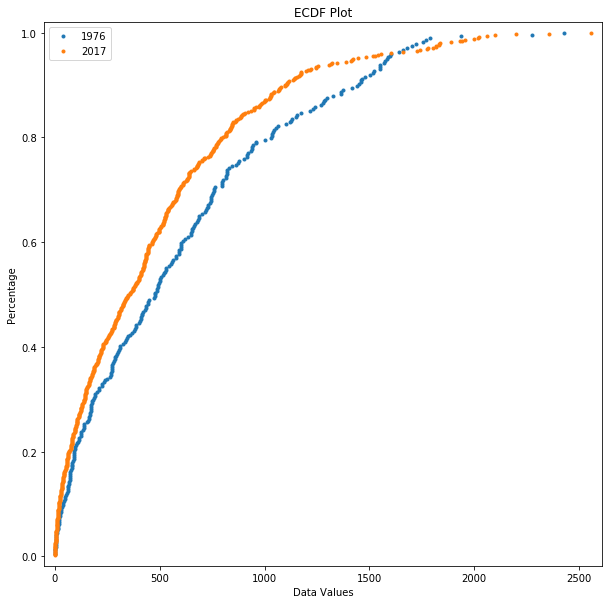

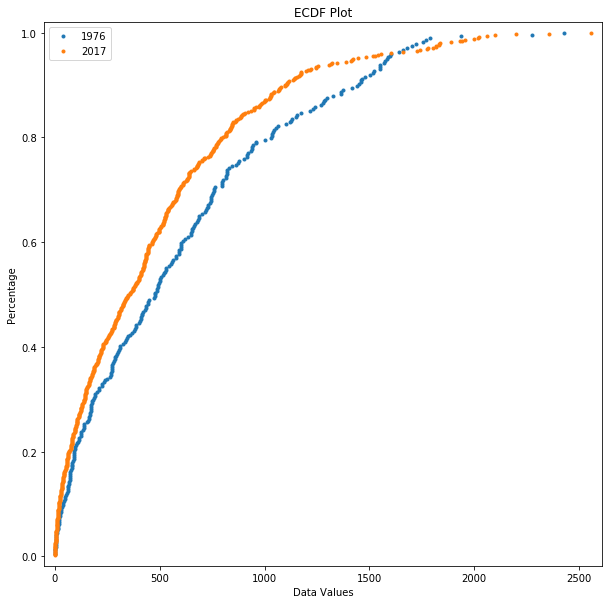

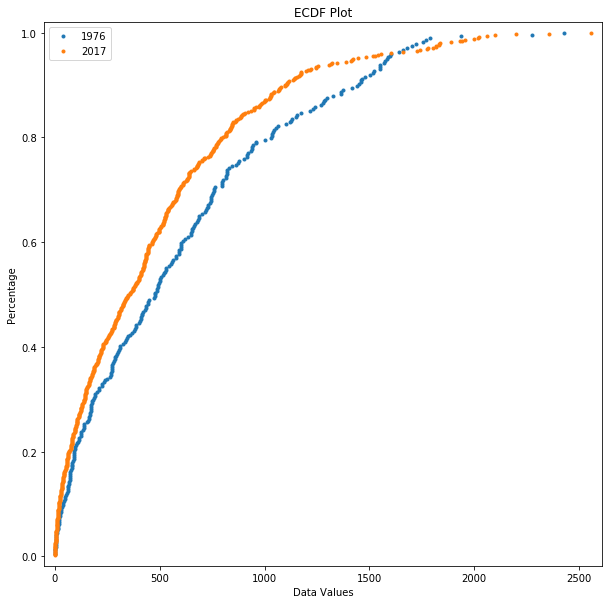

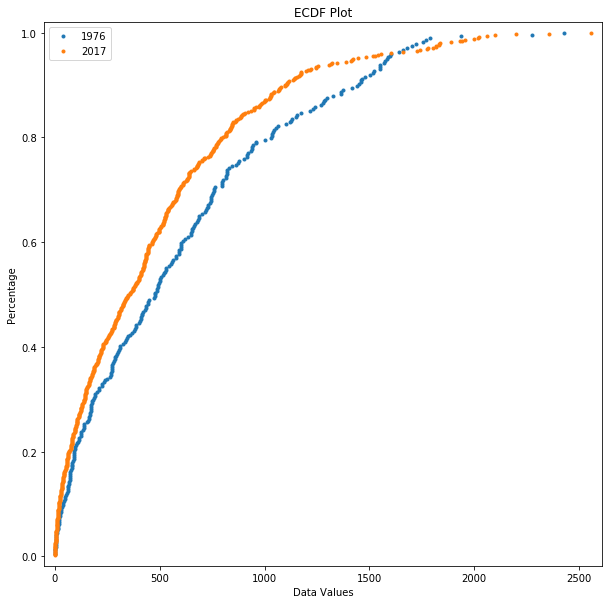

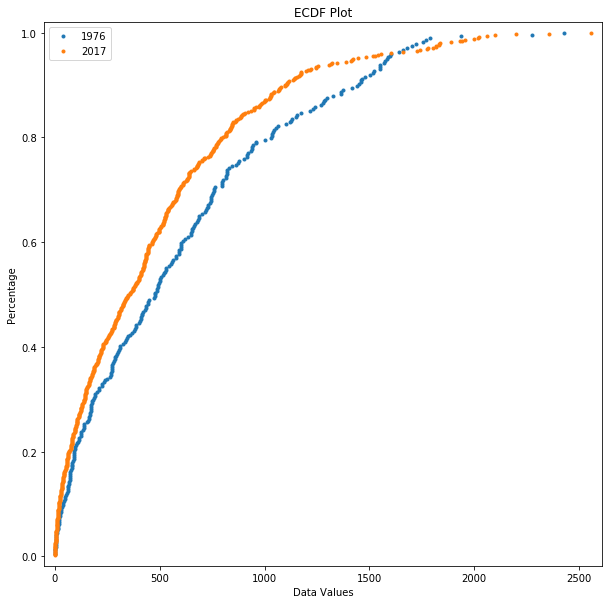

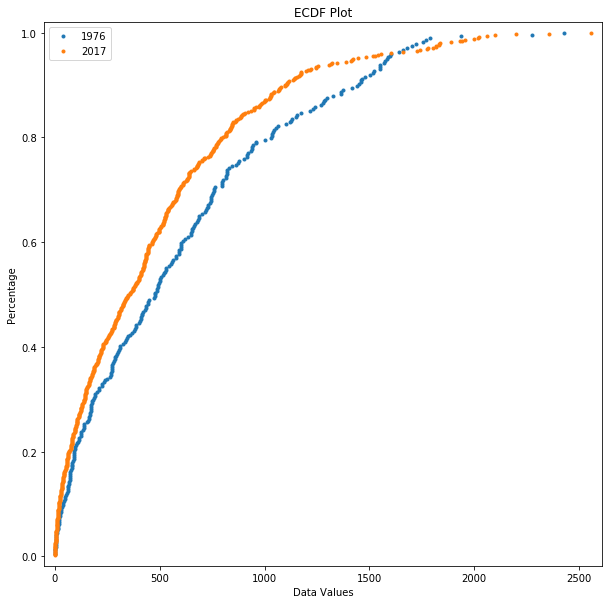

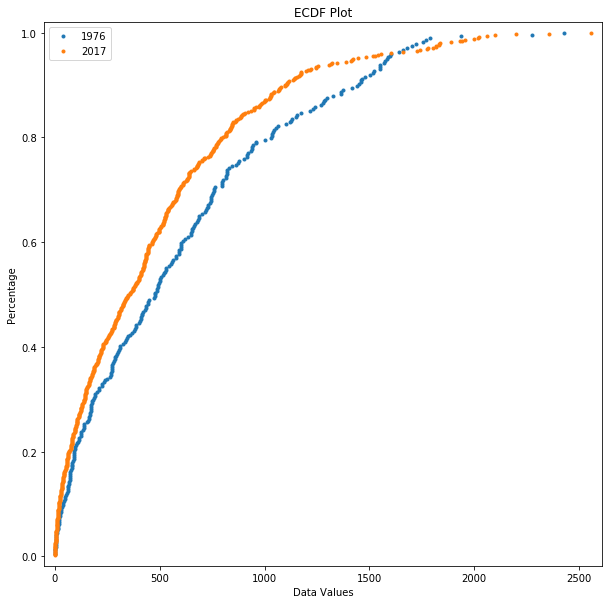

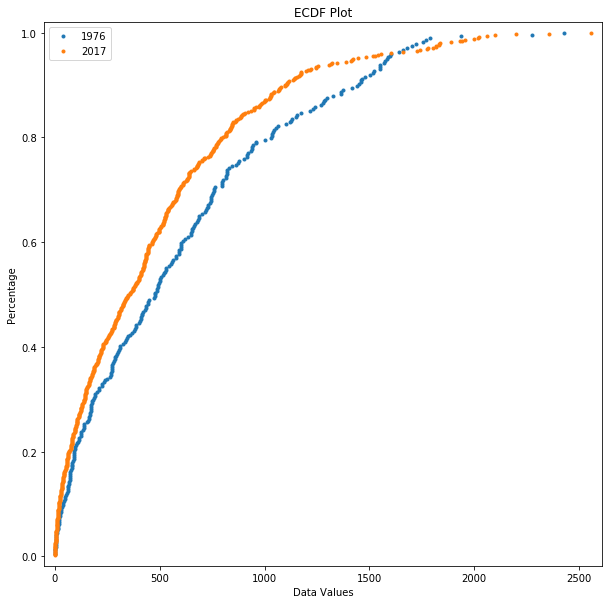

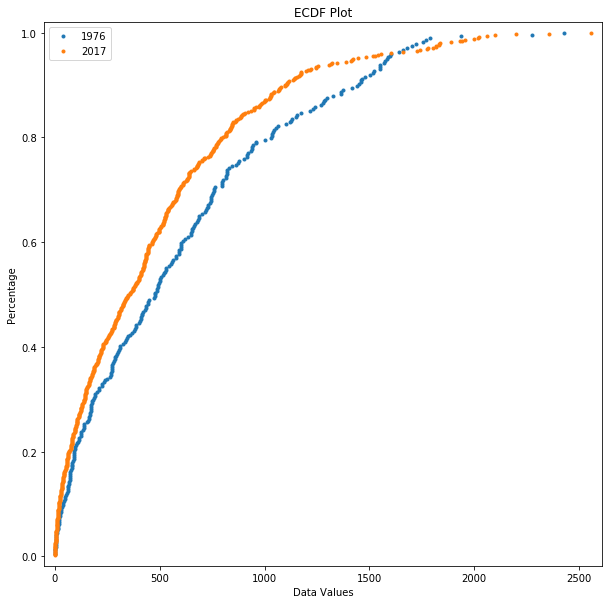

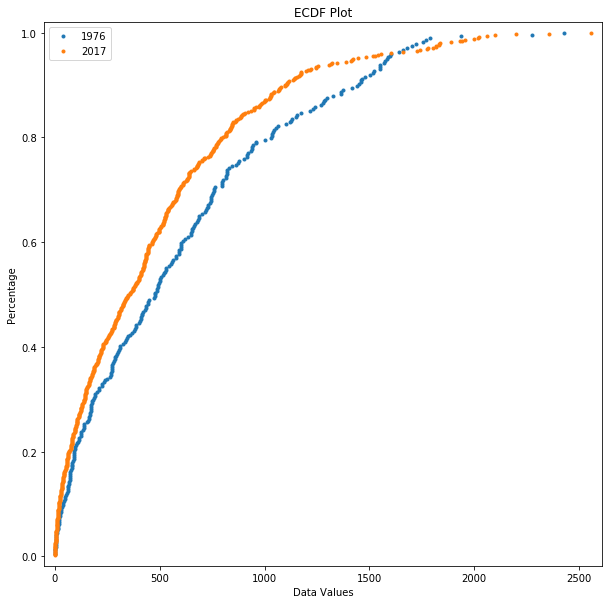

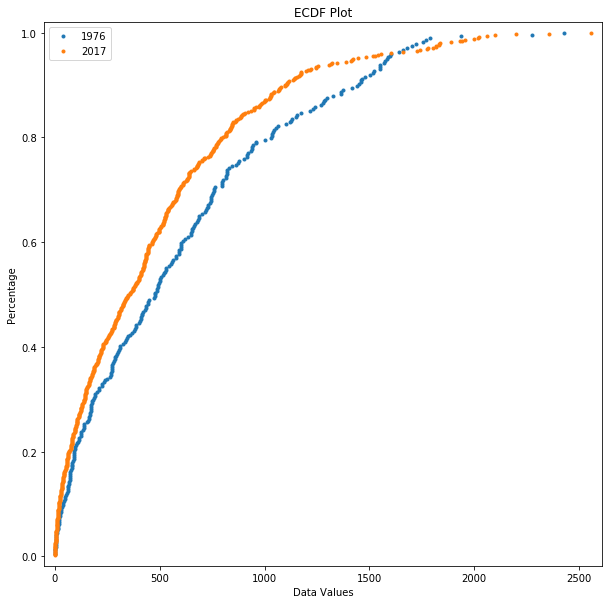

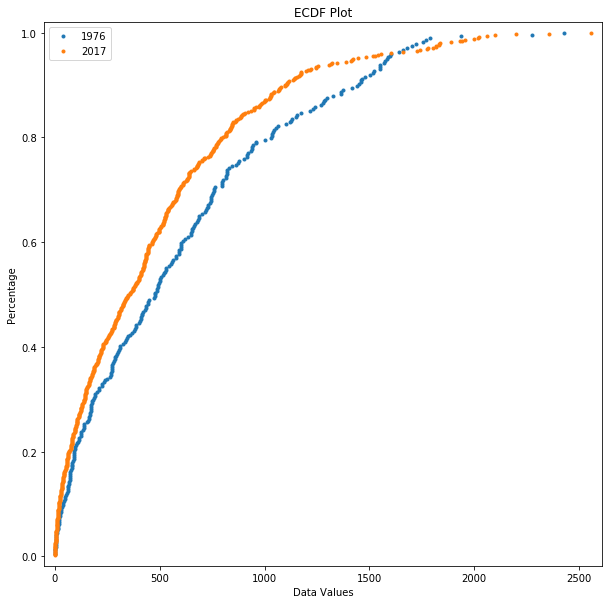

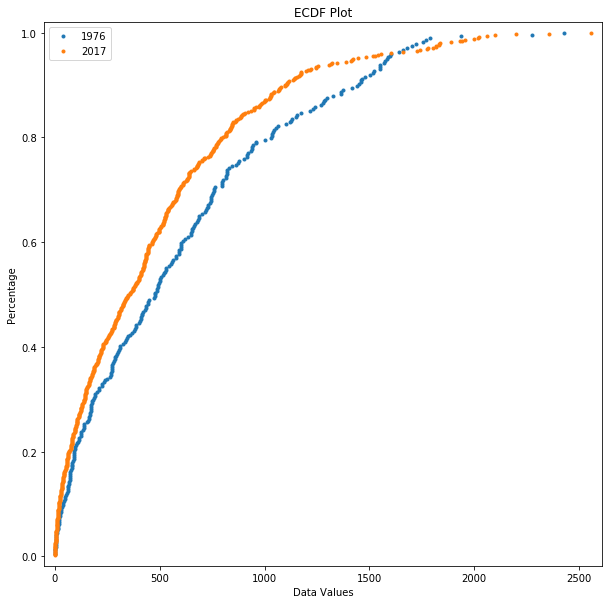

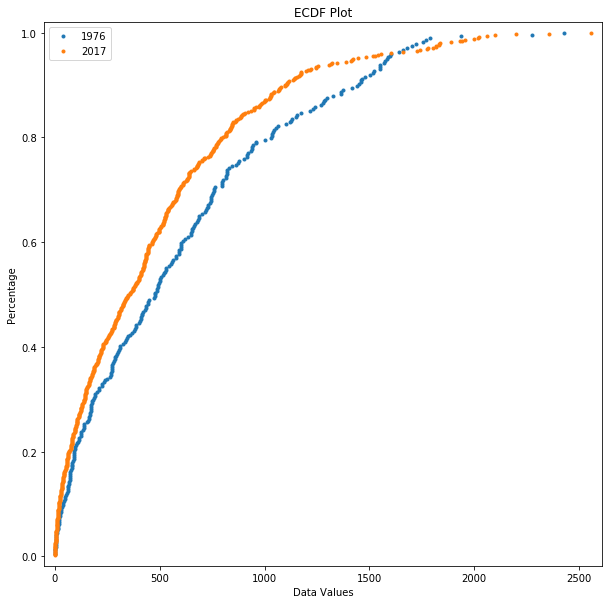

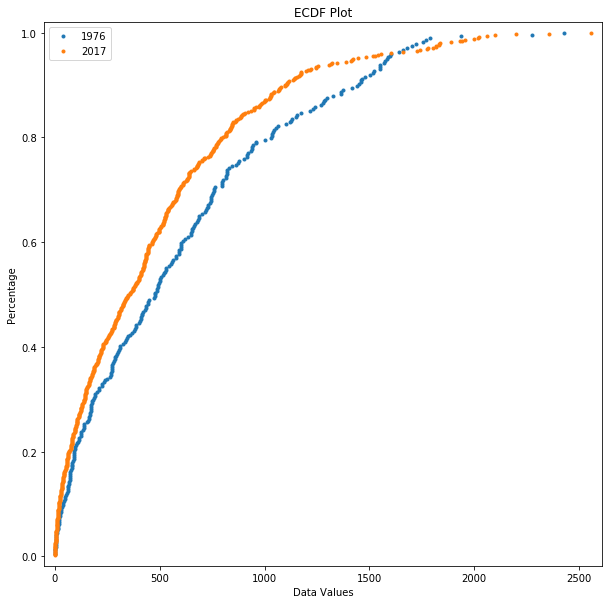

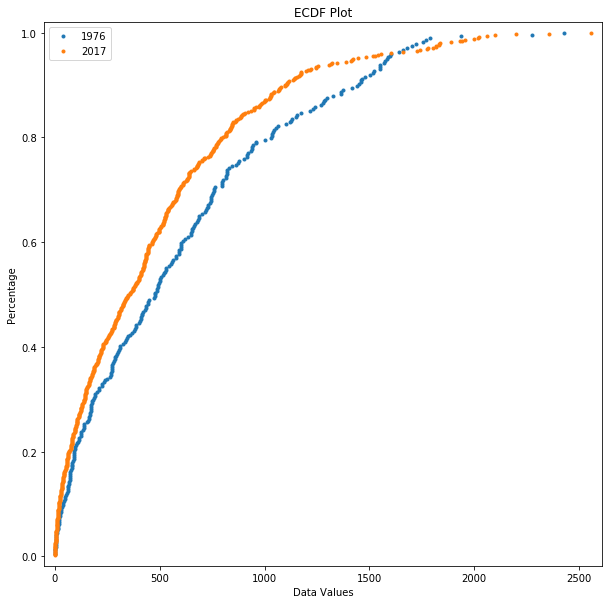

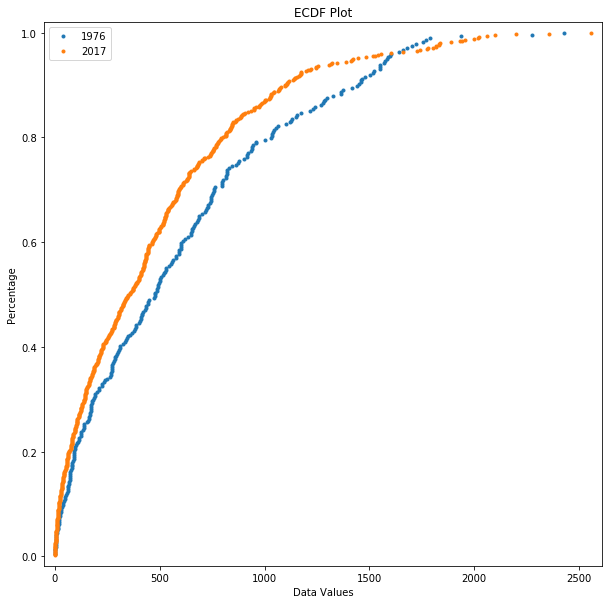

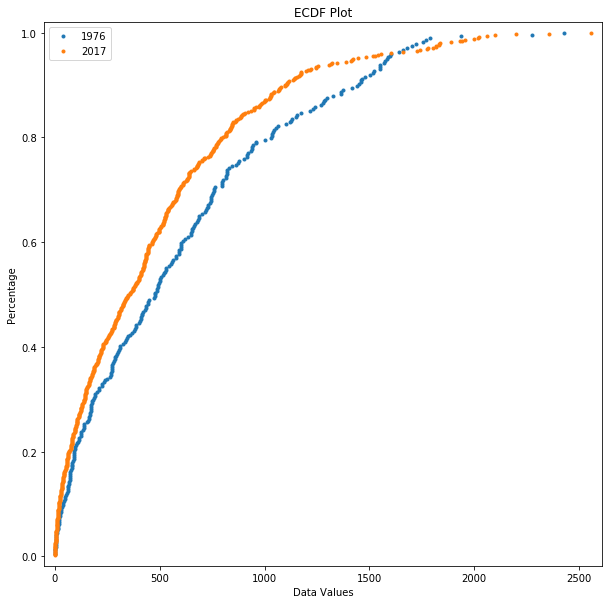

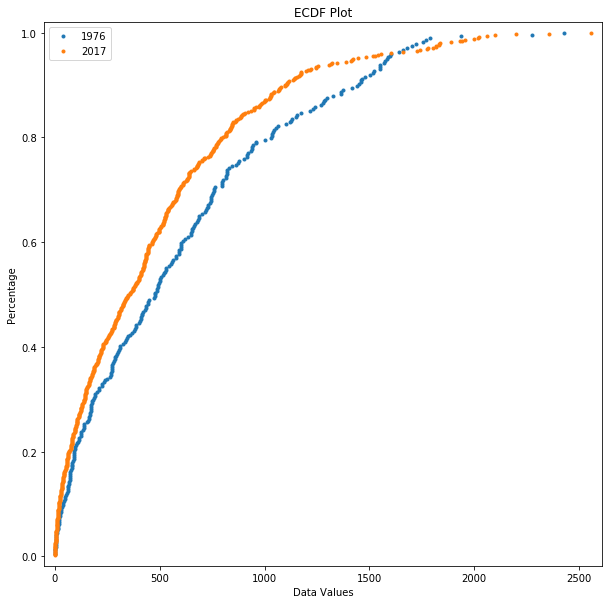

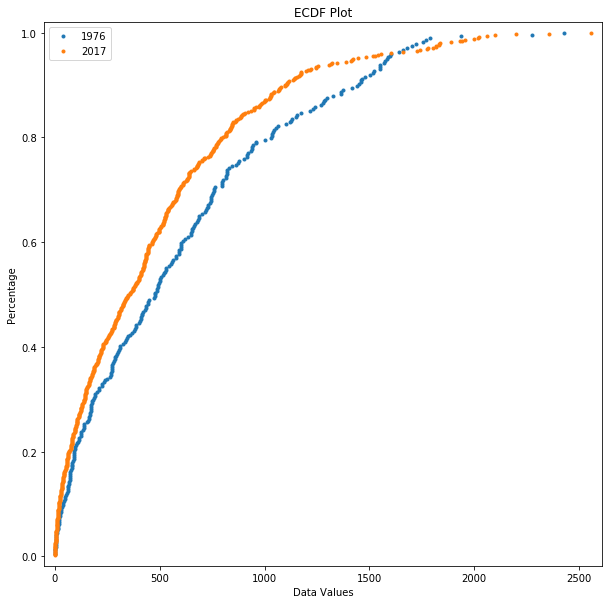

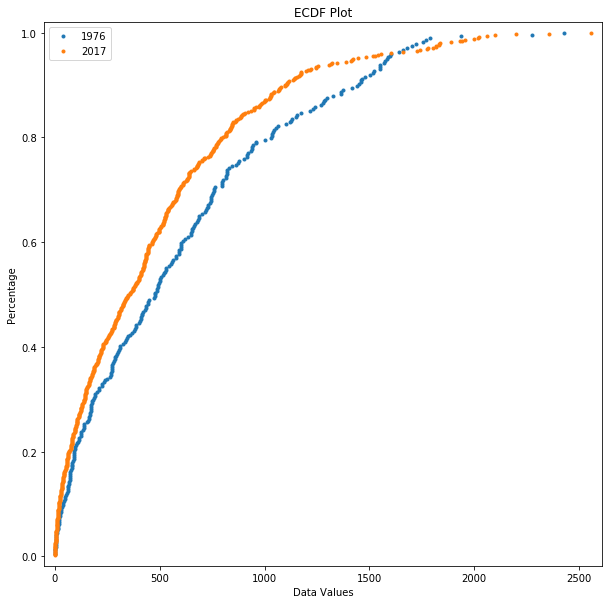

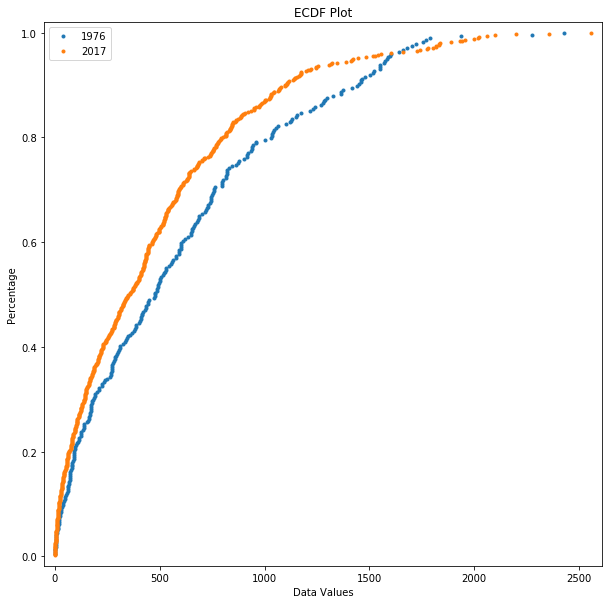

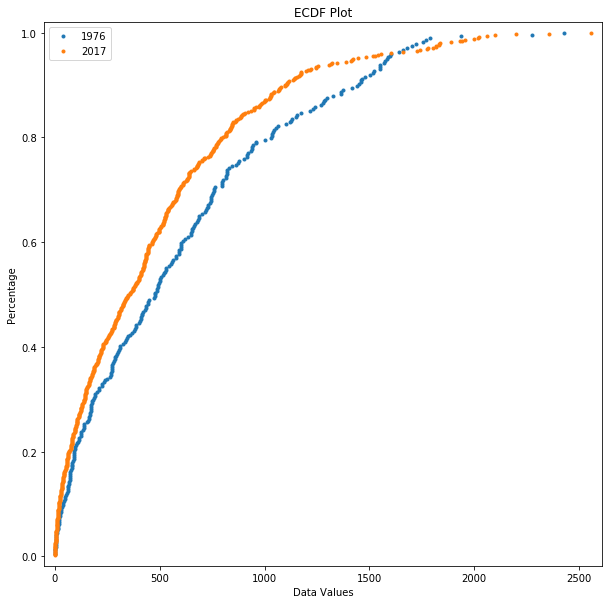

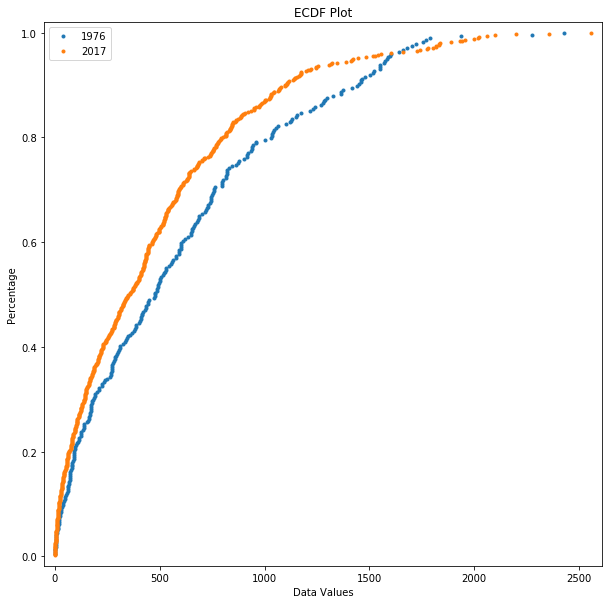

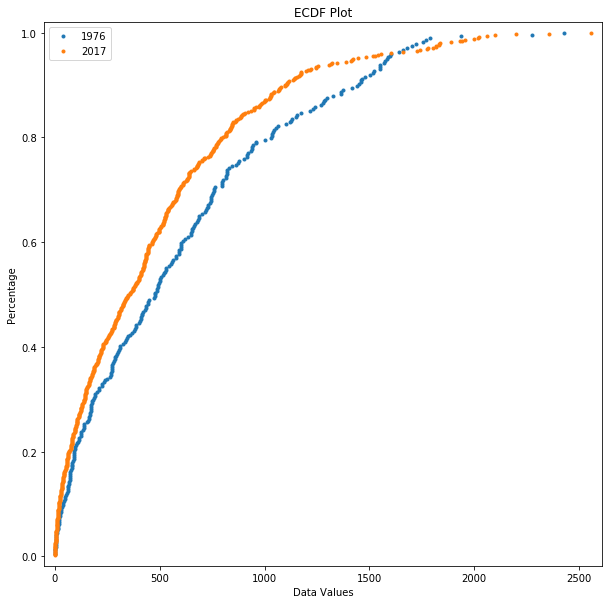

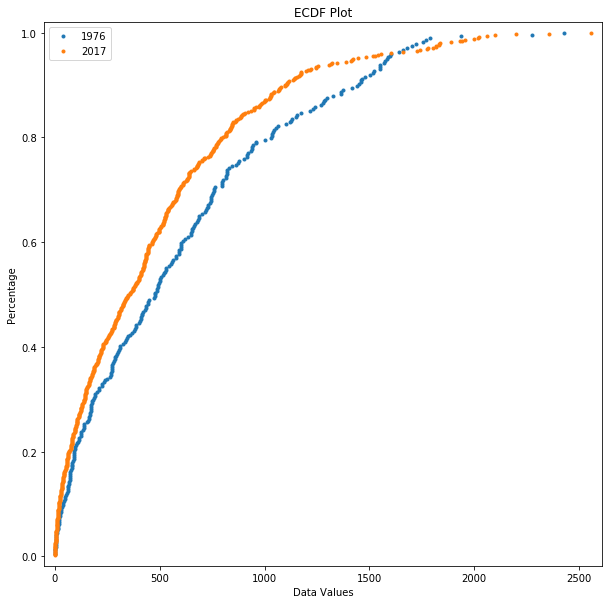

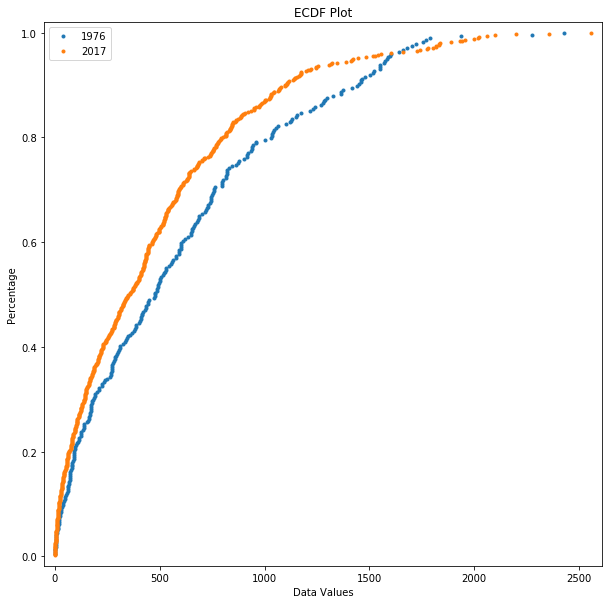

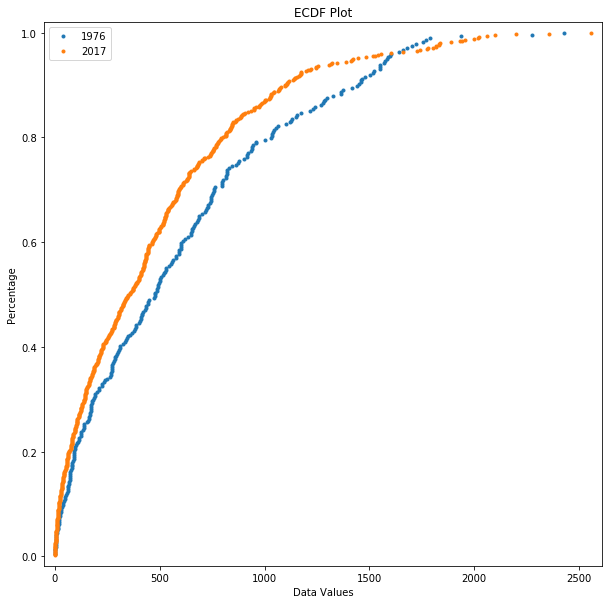

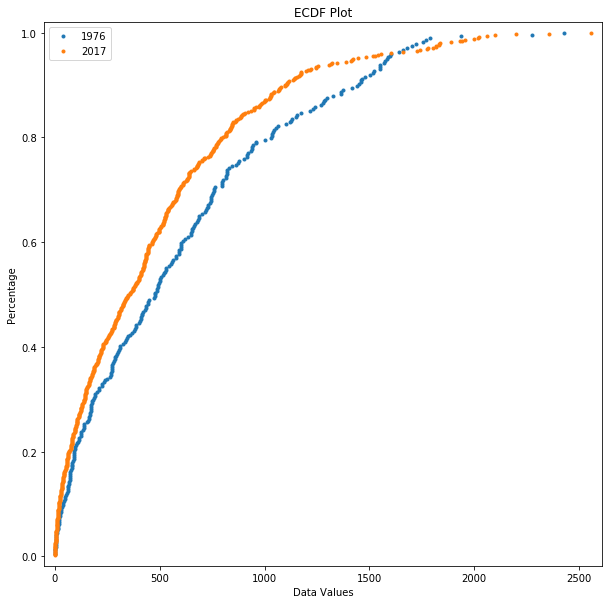

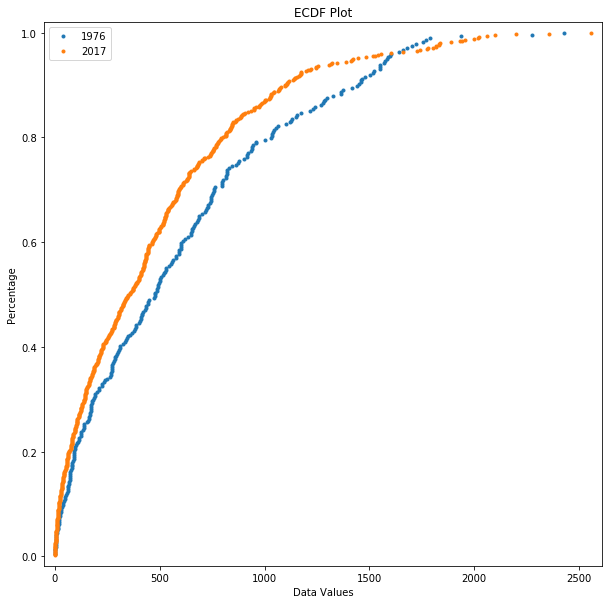

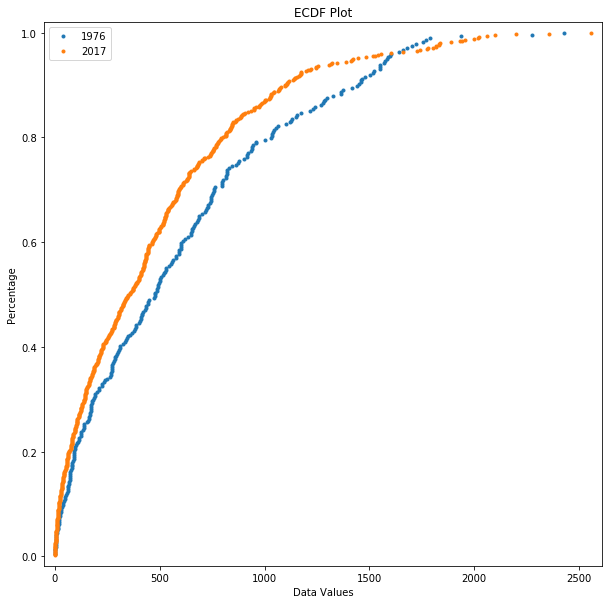

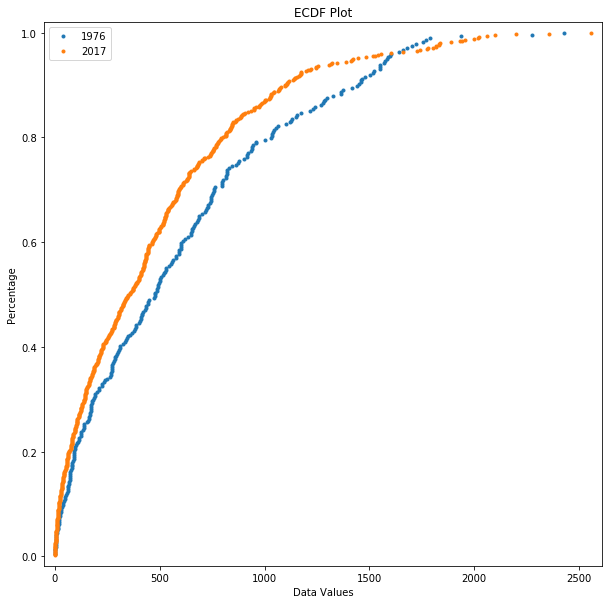

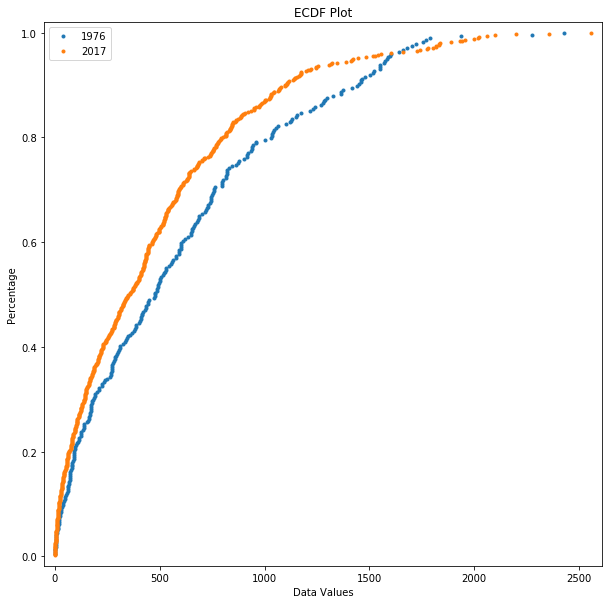

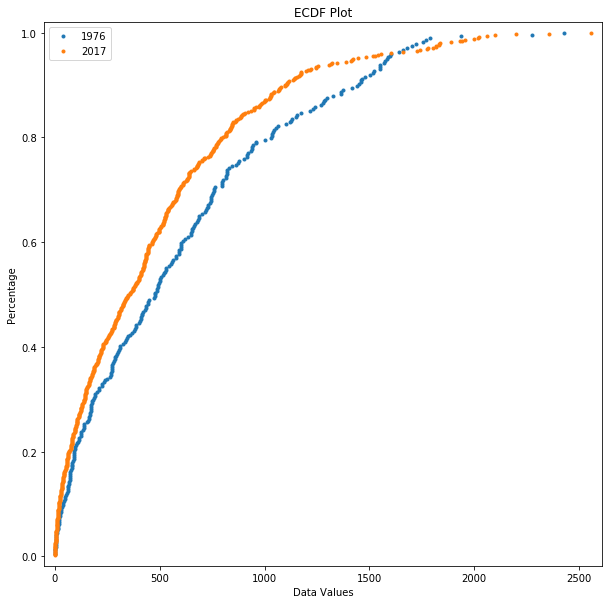

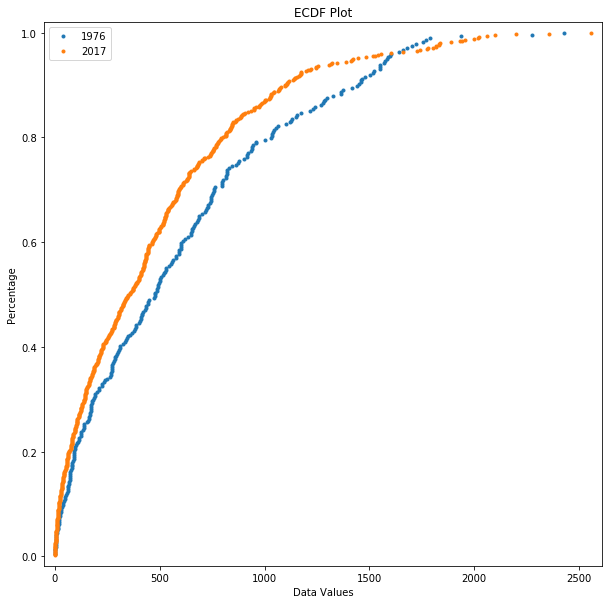

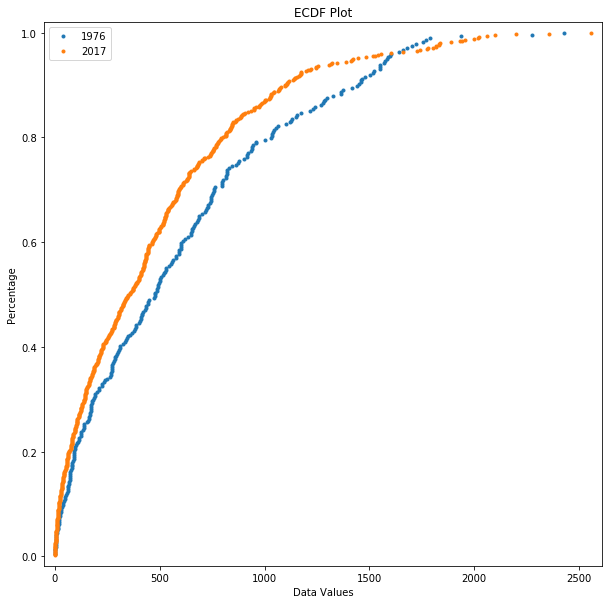

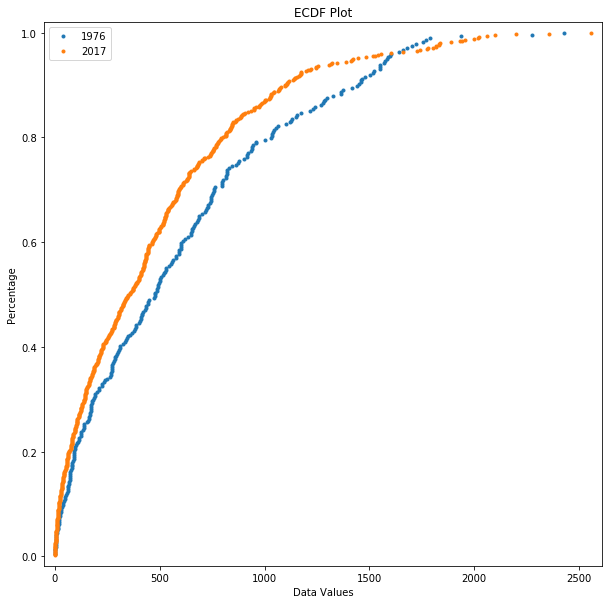

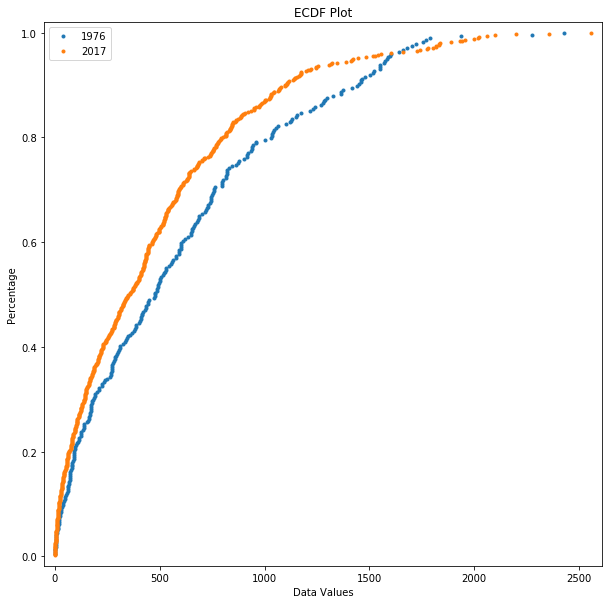

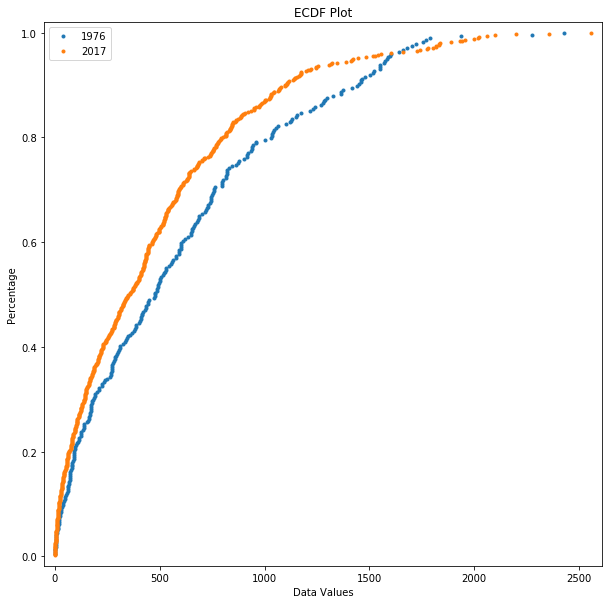

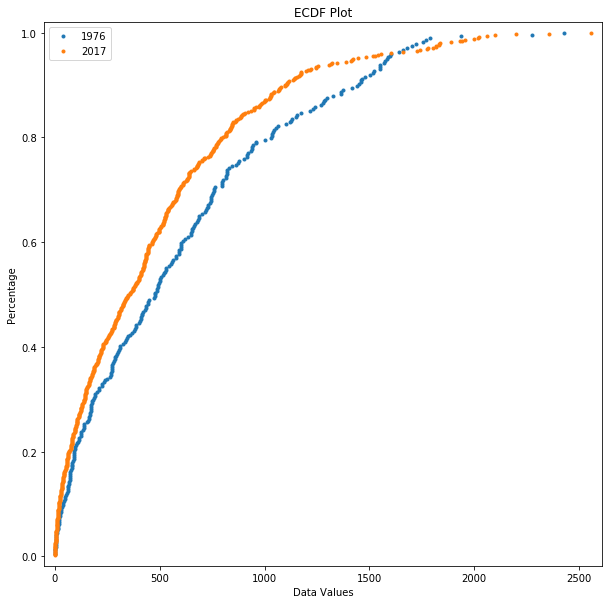

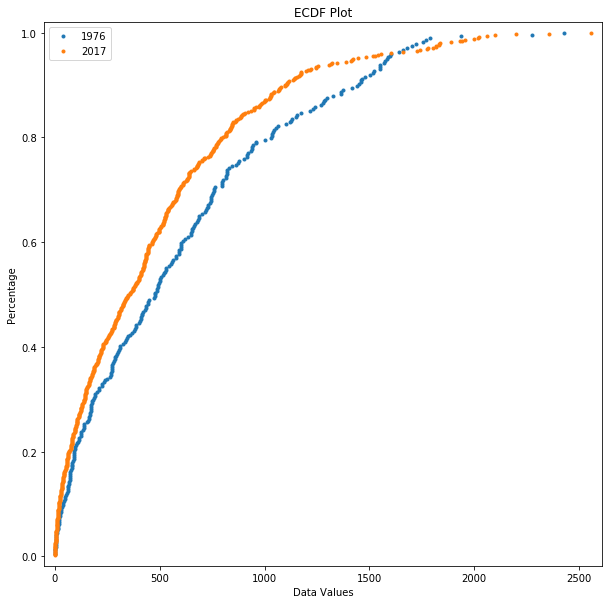

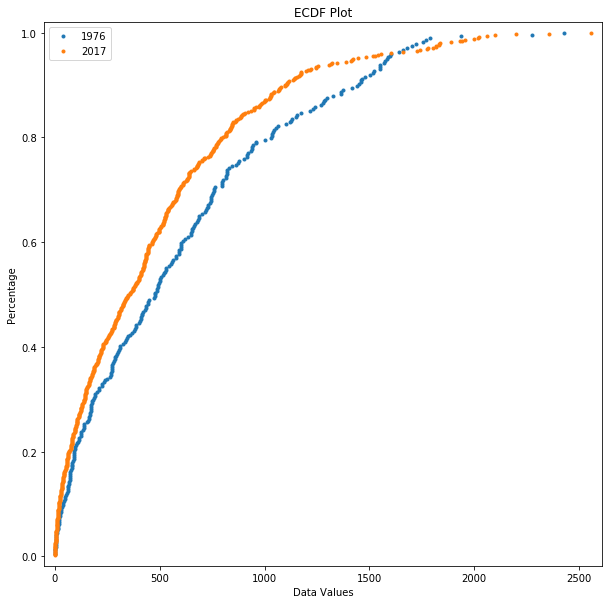

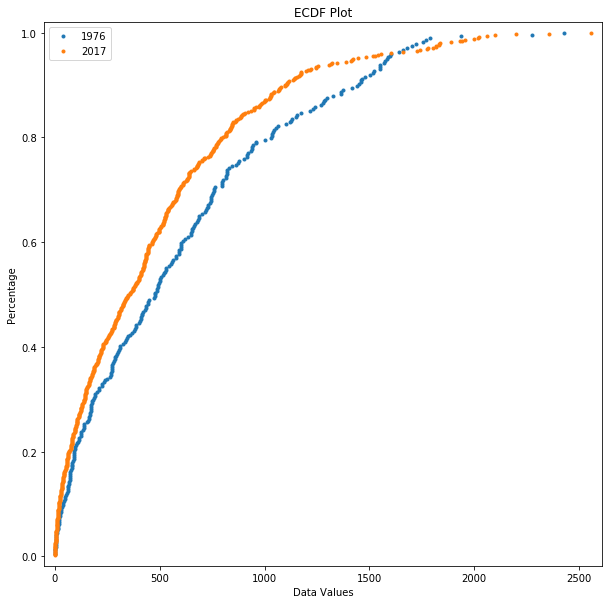

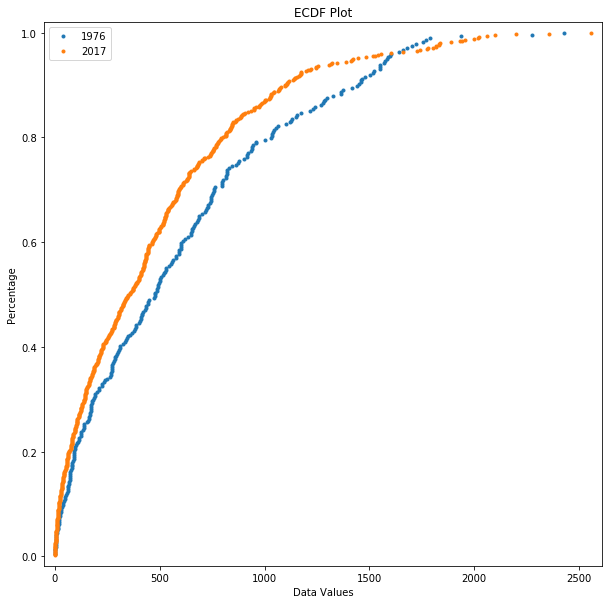

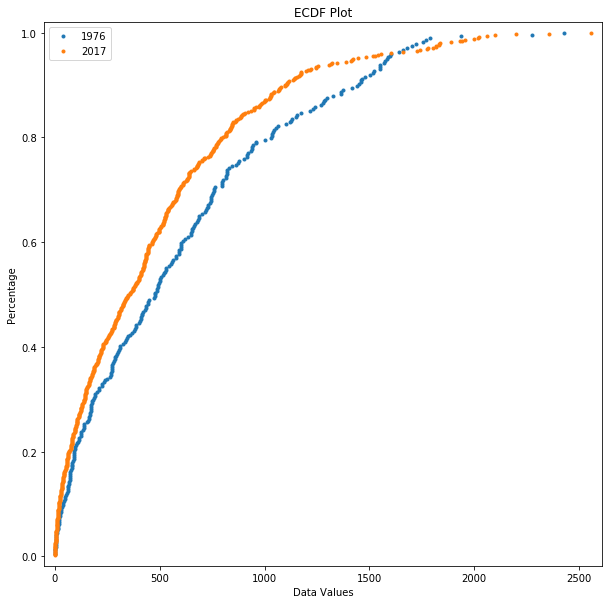

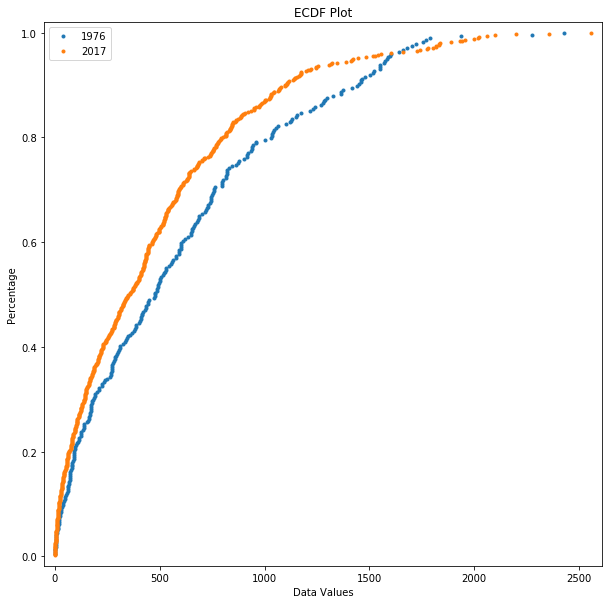

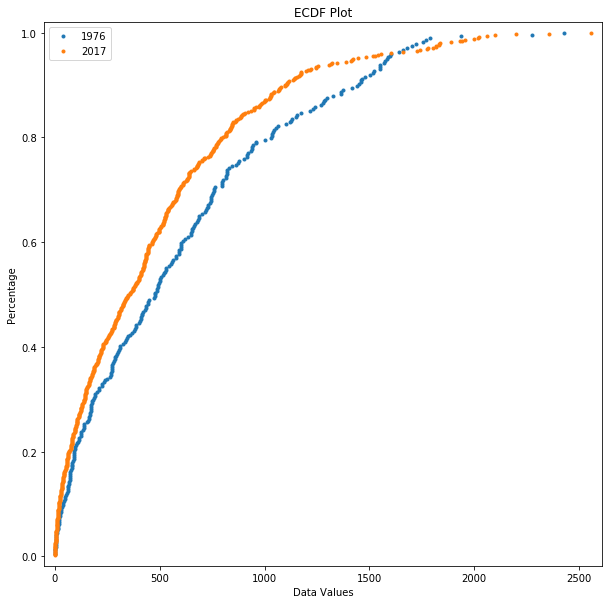

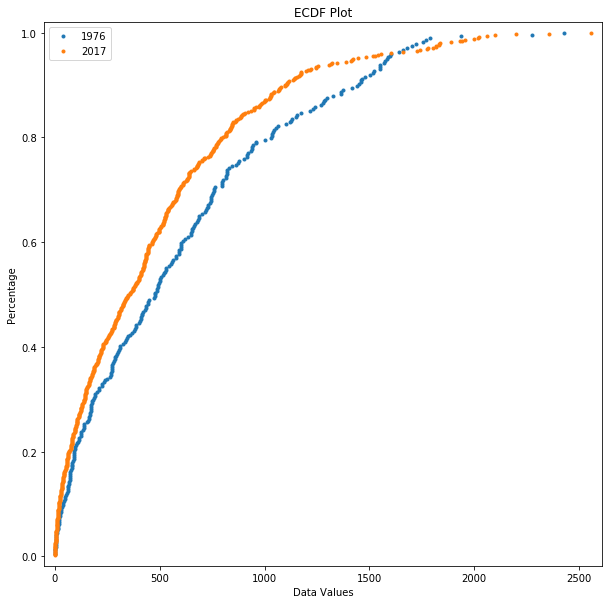

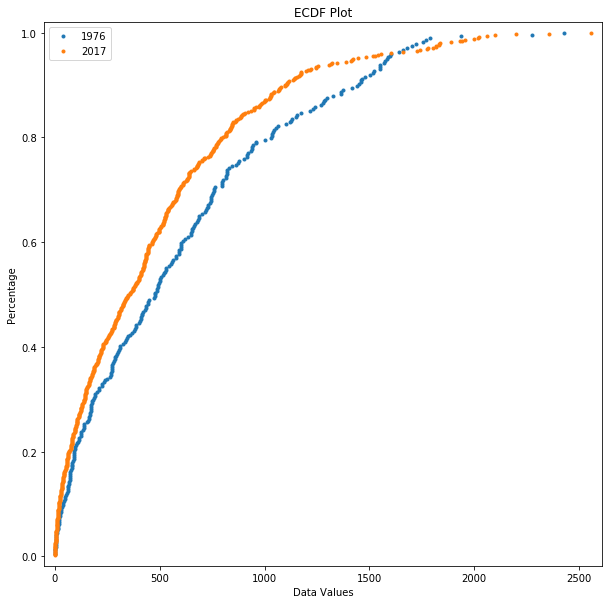

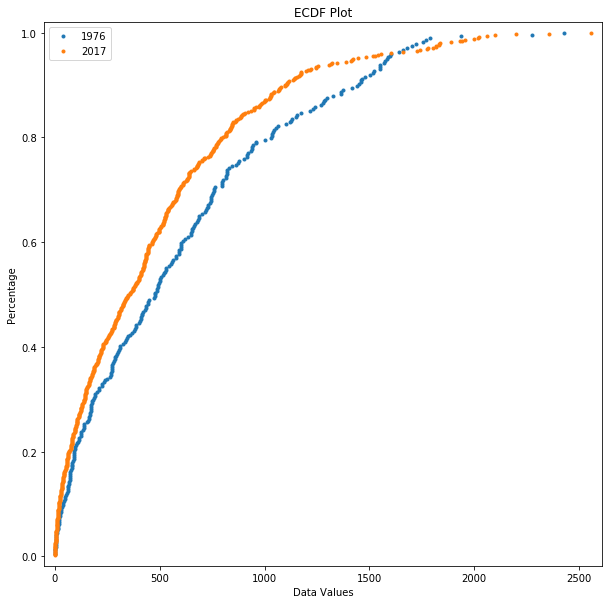

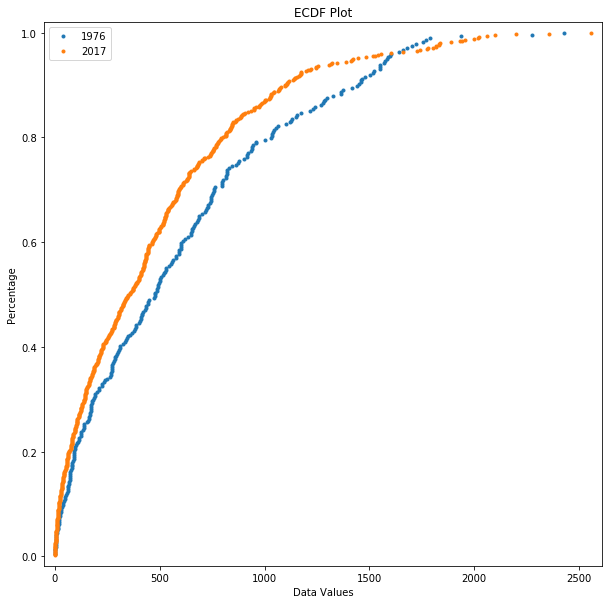

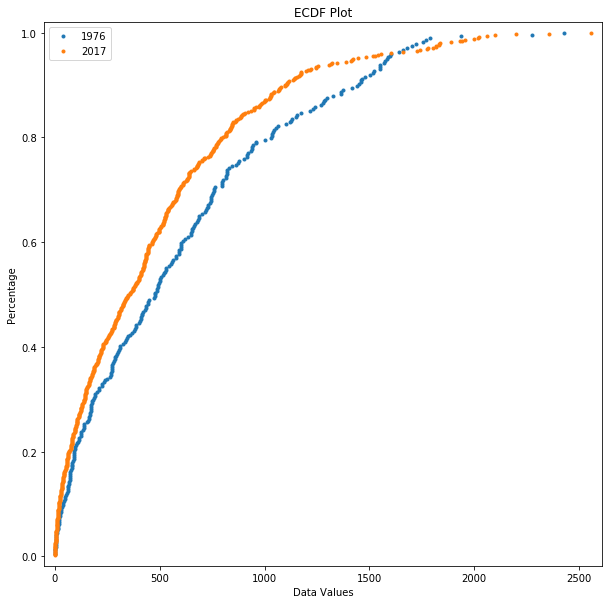

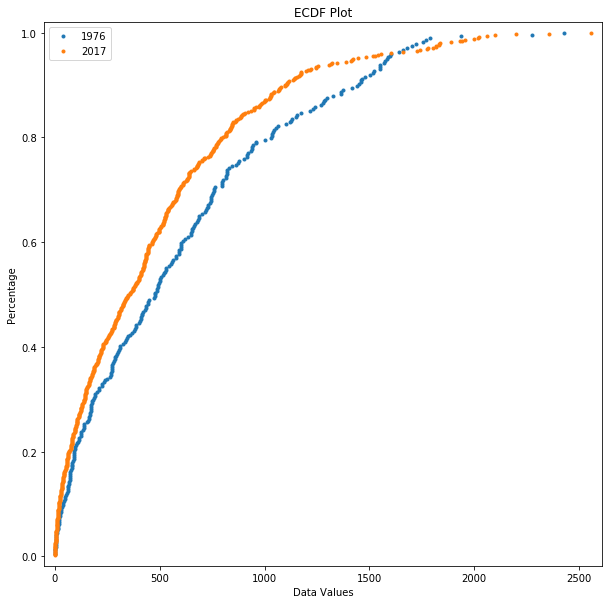

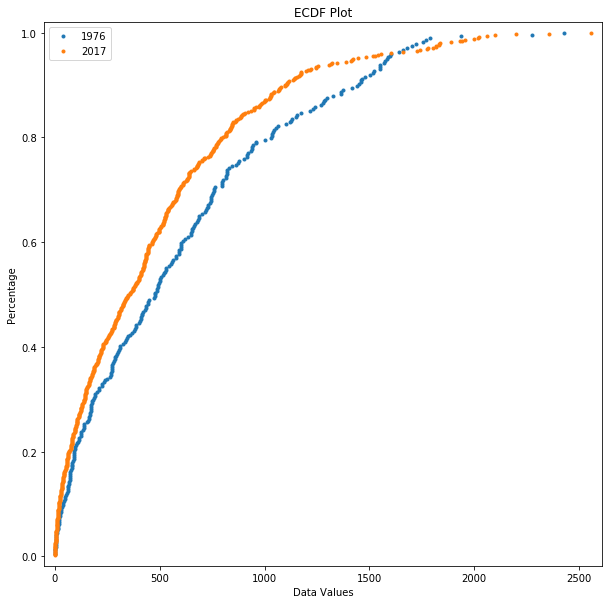

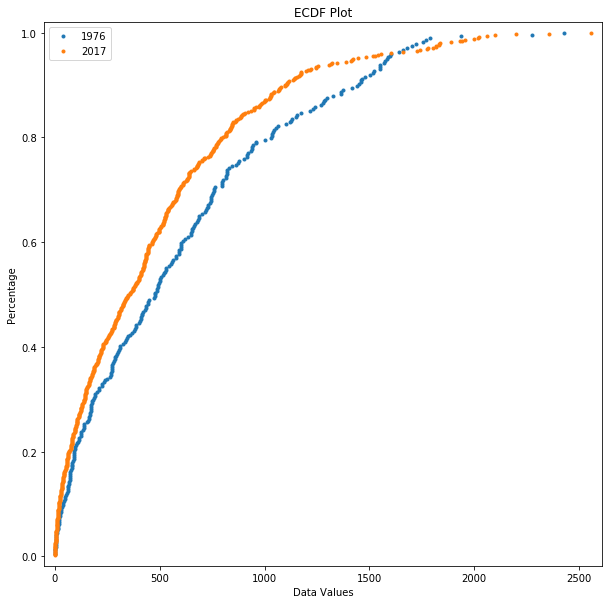

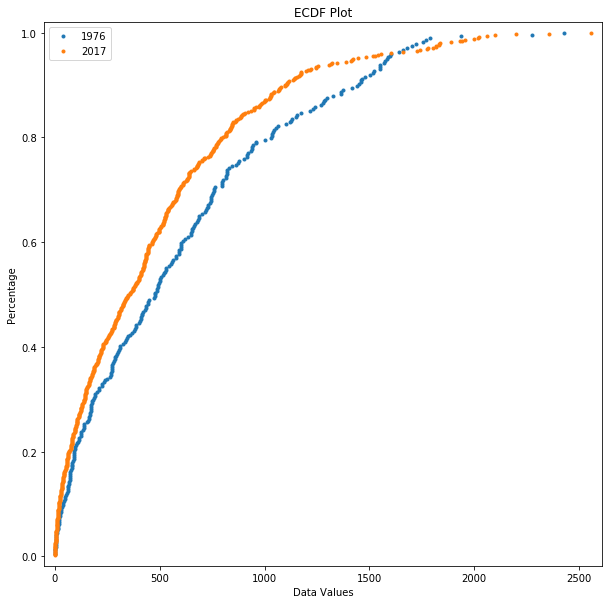

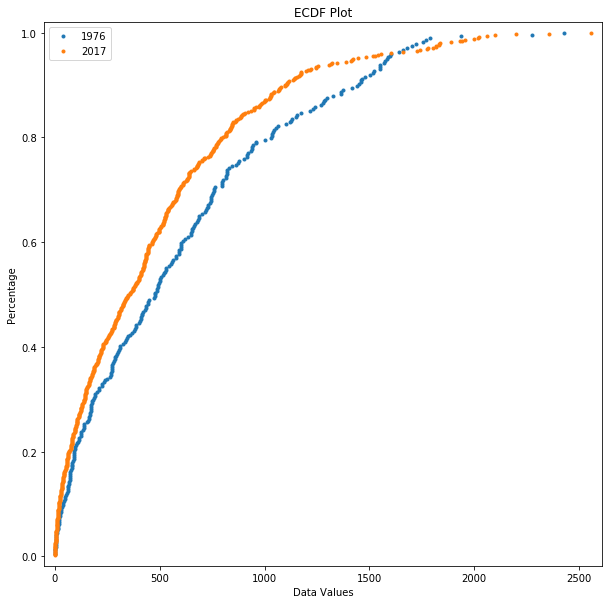

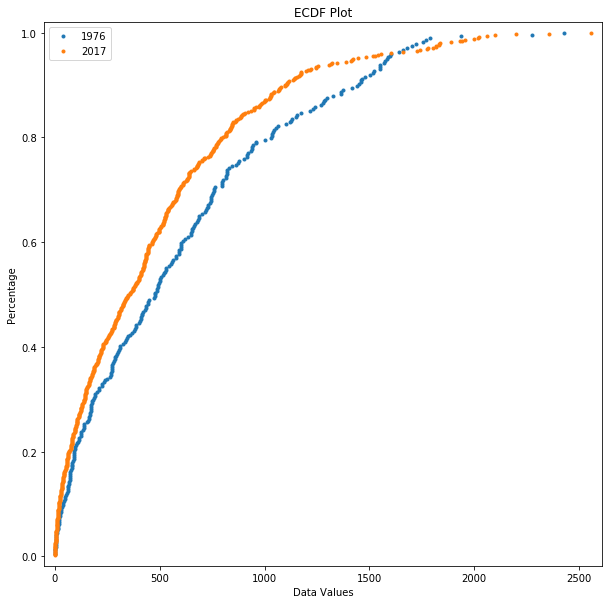

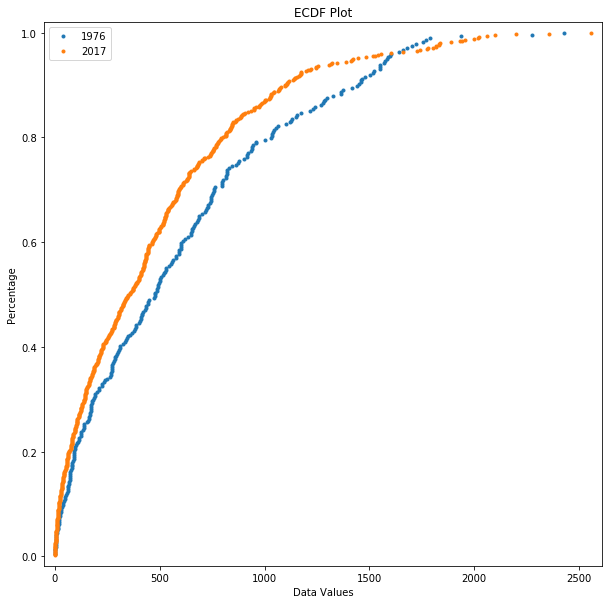

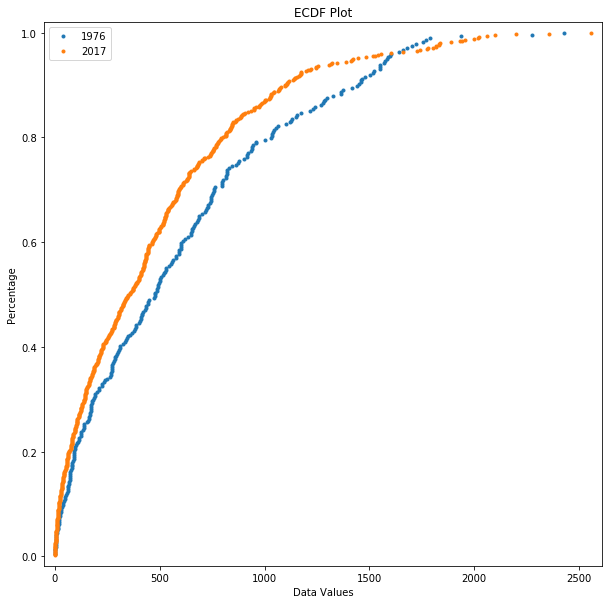

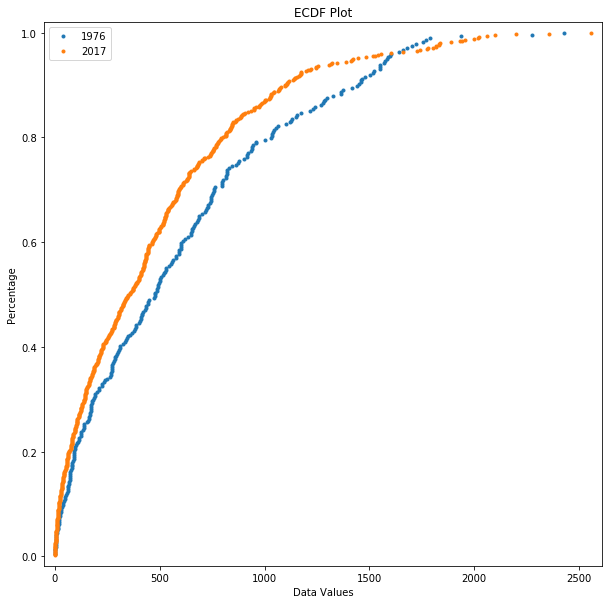

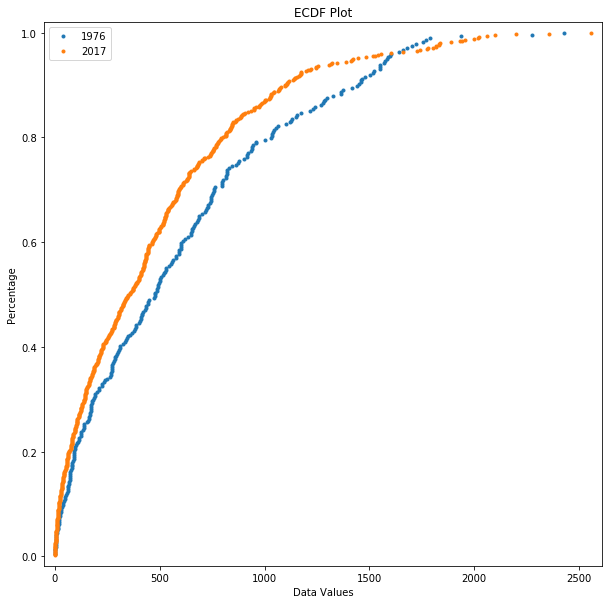

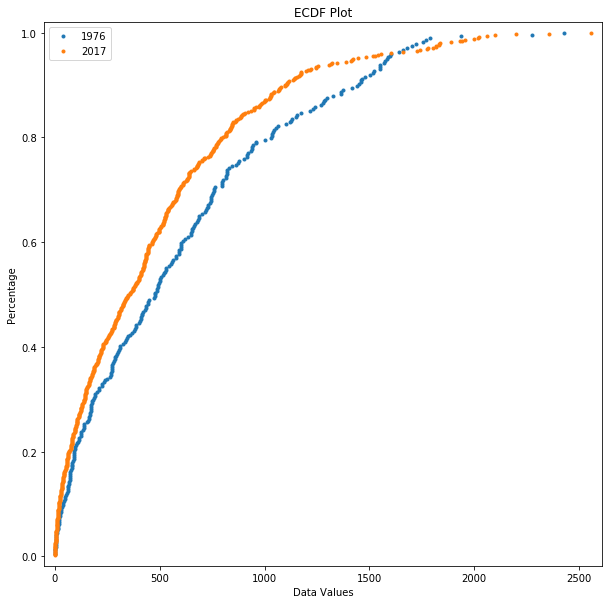

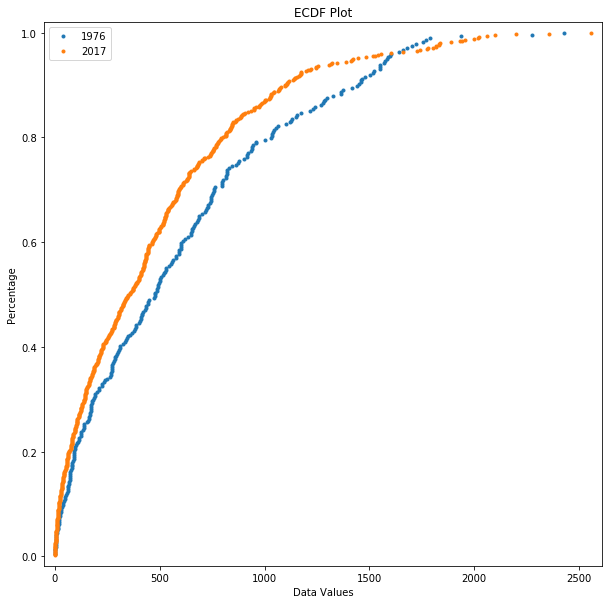

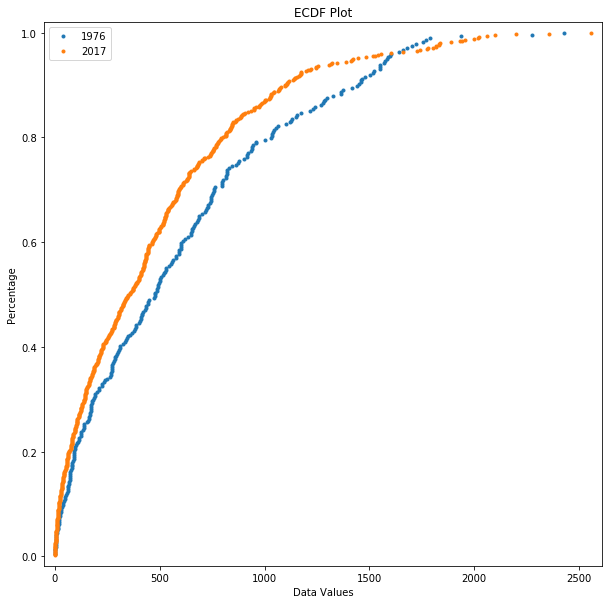

In [132]:
# plotting multiple may be difficult to read.

# set a variable for years
years = ryn.Year.unique()

# plot all years of the 
for year in years:
    plt.figure(figsize = (10,10))
    plot_ecdf(ryn['PTS'][ryn.Year == 1976])
    plot_ecdf(ryn['PTS'][ryn.Year == 2017])
    plt.legend(['1976','2017'])

plt.show()

In [0]:

X = modryn.Year.unique().reshape(-1,1)
Y = tes.PTS
X

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=0)

In [135]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-121.32233468321624
[0.28918835]


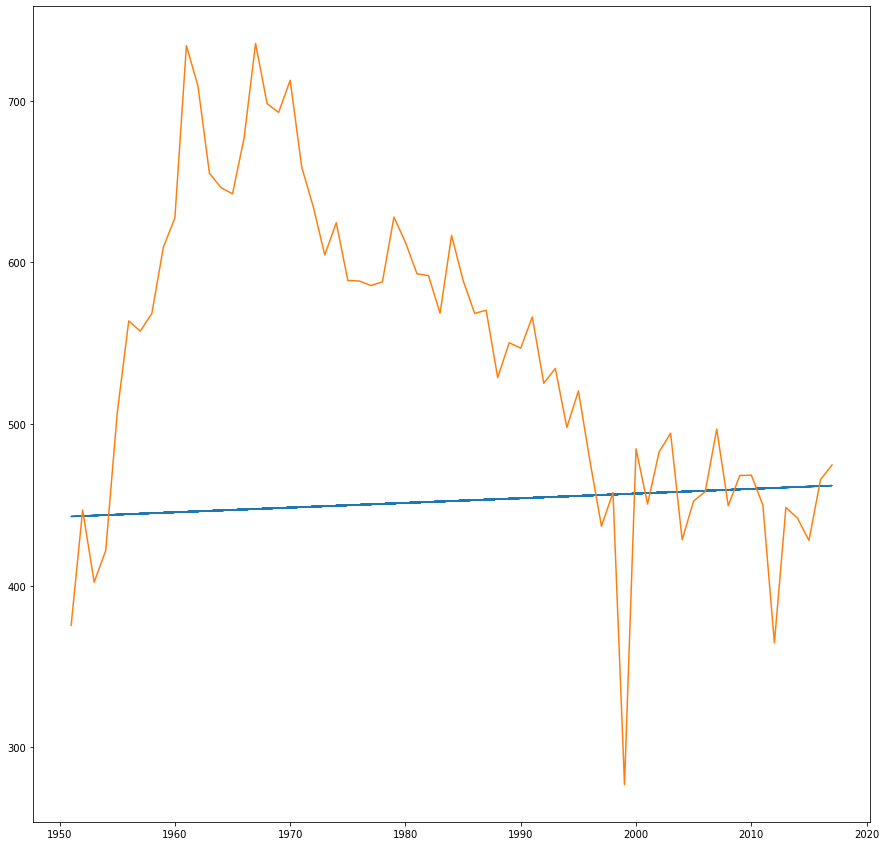

In [137]:
plt.figure(figsize = (15,15))
y_pred = regressor.predict(X_test)
plt.plot(X_test,y_pred)
plt.plot(tes.PTS)





In [112]:
tes.min()

TRB    125.820513
AST     62.954635
PTS    276.938856
dtype: float64

In [0]:

X = modryn.Year.unique().reshape(-1,1)
Y = tes.TRB


In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=0)

In [141]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2273.8781559315557
[-1.03584131]


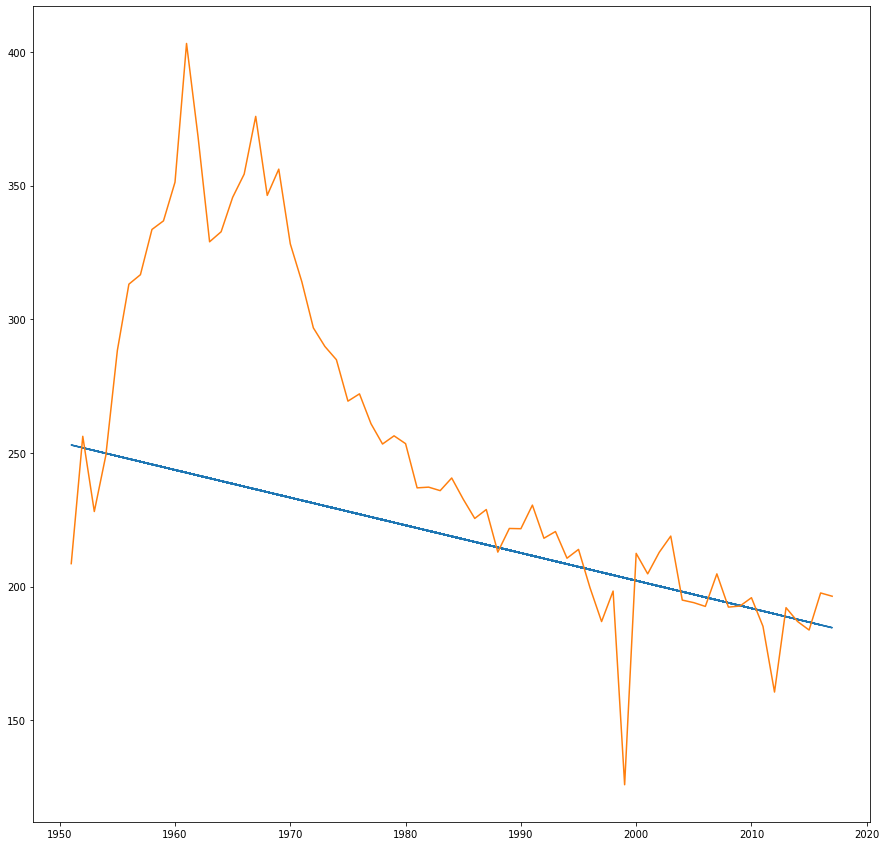

In [143]:
plt.figure(figsize = (15,15))

y_pred = regressor.predict(X_test)
plt.plot(X_test,y_pred)
plt.plot(tes.TRB)



In [0]:

X = modryn.Year.unique().reshape(-1,1)
Y = tes.AST
X

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=0)

In [146]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

475.4842646922549
[-0.18591394]


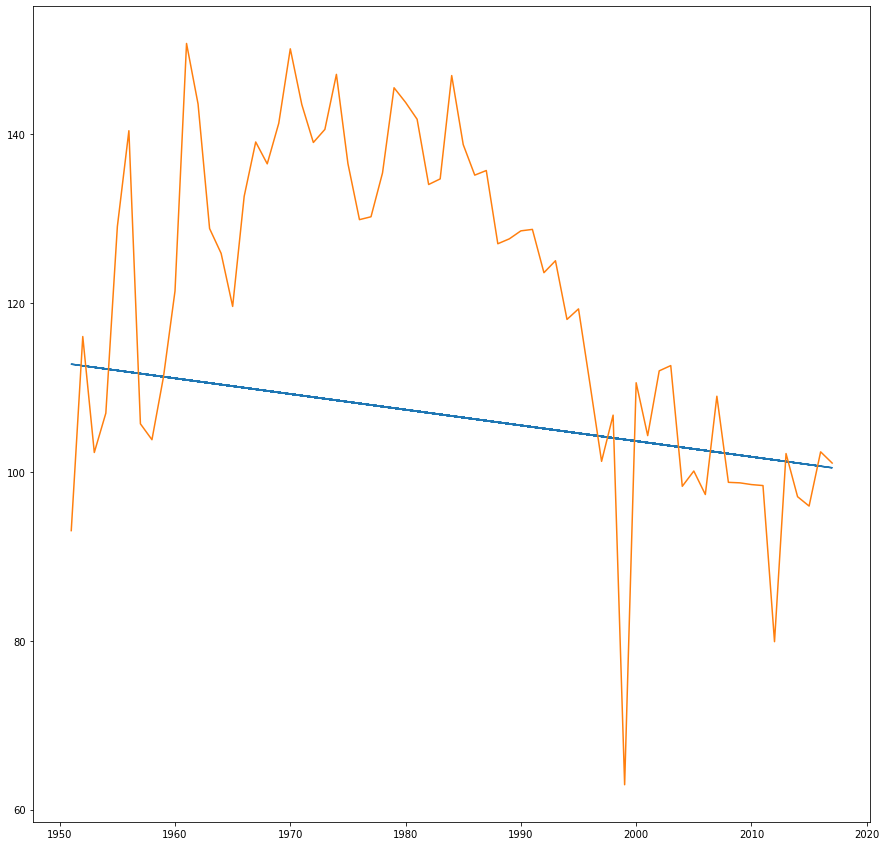

In [149]:
plt.figure(figsize = (15,15))
y_pred = regressor.predict(X_test)
plt.plot(X_test,y_pred)
plt.plot(tes.AST)

